In [709]:
# Scikit-Learn ≥0.20 is required
import sklearn

# Common imports
import numpy as np
import pandas as pd
import os
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from scipy.ndimage.interpolation import shift
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import scatter_matrix
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import expon, reciprocal, randint

np.random.seed(42)

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sn

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()

### Data exploration

In [710]:
data = pd.read_csv("datasets/titanic/train.csv")
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [711]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [712]:
# No dublicates
dublicated_rows = data[data.duplicated()]
dublicated_rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


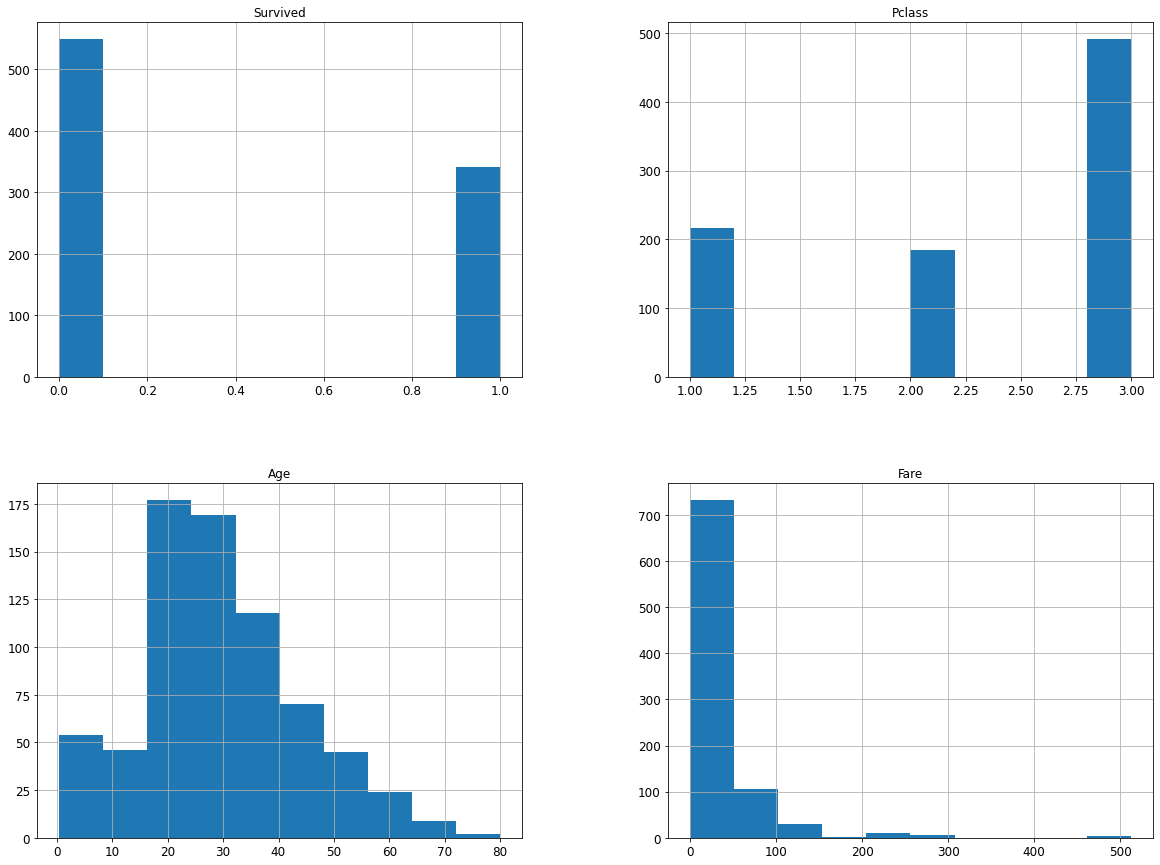

In [713]:
data.drop(["PassengerId", "Name", "Ticket", "SibSp", "Parch"], inplace = True , axis=1)
data.hist(figsize=(20,15))
plt.show()

In [714]:
data.dropna(subset = ["Embarked"], inplace = True)

In [715]:
data.head()

,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked
0,0,3,male,22.0,7.2500,NaN,S
1,1,1,female,38.0,71.2833,C85,C
2,1,3,female,26.0,7.9250,NaN,S
3,1,1,female,35.0,53.1000,C123,S
4,0,3,male,35.0,8.0500,NaN,S


In [716]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       712 non-null    float64
 4   Fare      889 non-null    float64
 5   Cabin     202 non-null    object 
 6   Embarked  889 non-null    object 
dtypes: float64(2), int64(2), object(3)
memory usage: 55.6+ KB


In [717]:
for i in data:
    print(data[i].value_counts(), "\n"*2)
print(data_to_check["Pclass"].unique())
print(data_to_check["Sex"].unique())
print(data_to_check["Embarked"].unique())

0    549
1    340
Name: Survived, dtype: int64 


3    491
1    214
2    184
Name: Pclass, dtype: int64 


male      577
female    312
Name: Sex, dtype: int64 


24.00    30
22.00    27
18.00    26
28.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64 


8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
7.8000      1
13.8583     1
7.6292      1
15.0500     1
8.6833      1
Name: Fare, Length: 247, dtype: int64 


C23 C25 C27    4
G6             4
B96 B98        4
E101           3
F2             3
              ..
C54            1
C50            1
B94            1
B38            1
C85            1
Name: Cabin, Length: 146, dtype: int64 


S    644
C    168
Q     77
Name: Embarked, dtype: int64 


[3 2 1]
['male' 'female']
['Q' 'S' 'C']


In [718]:
num_features = ["Age", "Fare"]
#cat_features = ["Pclass", "Sex", "SibSp", "Parch", "Cabin", "Embarked"]
cat_features = ["Pclass", "Sex", "Cabin", "Embarked"]
#cat_features = ["Pclass", "Sex", "Embarked"]
print("numerical features: ", num_features)
print("categorial features: ", cat_features)

numerical features:  ['Age', 'Fare']
categorial features:  ['Pclass', 'Sex', 'Cabin', 'Embarked']


### Correlations

In [719]:
corr_matrix = data.corr()

In [720]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.255290
Age        -0.082446
Pclass     -0.335549
Name: Survived, dtype: float64

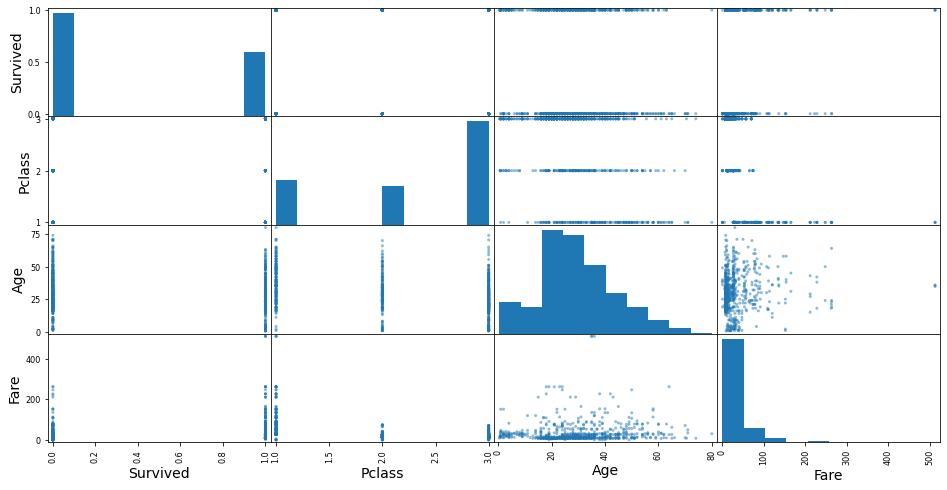

In [721]:
scatter_matrix(data, figsize=(16,8))
plt.show()

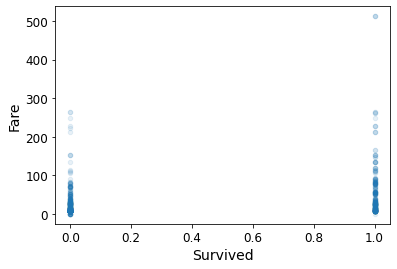

In [722]:
data.plot(kind="scatter", x="Survived", y="Fare", alpha=0.1)
plt.show()

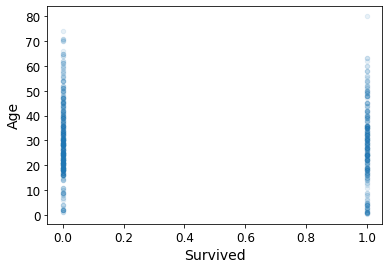

In [723]:
data.plot(kind="scatter", x="Survived", y="Age", alpha=0.1)
plt.show()

### Data preparation

In [724]:
data_labels = data["Survived"]
data = data.drop(["Survived"], axis=1)

In [725]:
def edit_age_and_fare(X):
    if "Age" in X.columns:
        median = X["Age"].mean()
        X["Age"].fillna(median, inplace=True)
    else:
        print("Age was already fixed")
    if "Fare" in X.columns:
        median = X["Fare"].mean()
        X["Fare"].fillna(median, inplace=True)
    else:
        print("Fare was already fixed")
    return X

def edit_cabin(X):
    if "Cabin" in X.columns:
        X["Cabin"].fillna("U", inplace=True)
    else:
        print("Cabin was already fixed")
    return X

def add_deck(X):       
    if "Deck" not in X.columns:
        X["Deck"] = [el[0] for el in X['Cabin']]
    else:
        print("Deck was already added and Cabin was deleted")
    return X

def delete_cabin(X):
    if "Cabin" in X.columns:
        X.drop(["Cabin"], axis=1,inplace=True)
    else:
        print("Cabin was already removed")
    return X

def return_self(X):
    return X

std_scaler = StandardScaler()
minmax_scaler = MinMaxScaler()
def scale_using_chosen_scaler(X, scaler):
    scaler.fit(X)
    return scaler.transform(X)

In [726]:
num_pipeline = Pipeline([  
    ("nan_replacement",  FunctionTransformer(edit_age_and_fare)),
    ("scaler",  FunctionTransformer(scale_using_chosen_scaler, kw_args={"scaler": minmax_scaler}))
    ])

cat_pipeline = Pipeline([  
    ("edit_cabin",  FunctionTransformer(edit_cabin)),
    ("add_deck",  FunctionTransformer(add_deck)),
    ("delete_cabin",  FunctionTransformer(delete_cabin)),
    ("encode", OneHotEncoder(handle_unknown="ignore"))
    ])

combined_num_cat_pipeline = ColumnTransformer([
    ("prepare_num_data", num_pipeline, num_features),
    ("prepare_cat_data", cat_pipeline, cat_features),
])

In [727]:
final_data = combined_num_cat_pipeline.fit_transform(data)
print("final data shape is", final_data.shape)
try:
    final_data= final_data.to_array()
except:
    pass
final_data

final data shape is (889, 19)


array([[0.27117366, 0.01415106, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.4722292 , 0.13913574, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32143755, 0.01546857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.36720398, 0.04577135, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32143755, 0.0585561 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39683338, 0.01512699, 0.        , ..., 0.        , 0.        ,
        1.        ]])

### Split into train and test sets

In [728]:
X = final_data
y = data_labels
print(X.shape, y.shape)

(889, 19) (889,)


In [729]:
X

array([[0.27117366, 0.01415106, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.4722292 , 0.13913574, 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.32143755, 0.01546857, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.36720398, 0.04577135, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.32143755, 0.0585561 , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.39683338, 0.01512699, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [730]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 889, dtype: int64

In [731]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify = y)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(666, 19) (223, 19) (666,) (223,)


### Selection of Binary Classifier

Training a set of classifiers to choose one for more GridSearch

In [732]:
def analyze_model_initially(model, folds, scoring):
    try:
        model = model[0]
    except:
        pass
    model.fit(X_train, y_train)
    print(model)
    print("cross_val_score on test_set -", scoring, ":", cross_val_score(model, X_test, y_test, cv=folds, scoring=scoring))
    print()
    result_minumum = min(cross_val_score(model, X_test, y_test, cv=folds, scoring=scoring))
    return result_minumum

def analyze_all_models(models, folds):
    results = dict()
    for model in models:
        results[model] = analyze_model_initially(model, folds, "accuracy")
    sorted_results = sorted(results, key=results.get)
    for el in sorted_results:
        print(el, results[el])

In [733]:
sgd_clf = SGDClassifier()
knn_clf = KNeighborsClassifier()
mlp_clf = MLPClassifier(max_iter=2000)
svc_clf = SVC()
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
gpc_clf =GaussianProcessClassifier()
gnb_clf = GaussianNB()
qda_clf = QuadraticDiscriminantAnalysis()

models = [
    sgd_clf,
    knn_clf,
    mlp_clf,
    svc_clf,
    dt_clf,
    rf_clf,
    ada_clf,
    gpc_clf,
    gnb_clf,
    qda_clf
]

analyze_all_models(models, 2)

SGDClassifier()
cross_val_score on test_set - accuracy : [0.80357143 0.72972973]

KNeighborsClassifier()
cross_val_score on test_set - accuracy : [0.82142857 0.81981982]

MLPClassifier(max_iter=2000)
cross_val_score on test_set - accuracy : [0.74107143 0.79279279]

SVC()
cross_val_score on test_set - accuracy : [0.83035714 0.72972973]

DecisionTreeClassifier()
cross_val_score on test_set - accuracy : [0.76785714 0.74774775]

RandomForestClassifier()
cross_val_score on test_set - accuracy : [0.77678571 0.79279279]

AdaBoostClassifier()
cross_val_score on test_set - accuracy : [0.70535714 0.7027027 ]

GaussianProcessClassifier()
cross_val_score on test_set - accuracy : [0.83035714 0.79279279]

GaussianNB()
cross_val_score on test_set - accuracy : [0.4375     0.69369369]

QuadraticDiscriminantAnalysis()
cross_val_score on test_set - accuracy : [0.61607143 0.62162162]

GaussianNB() 0.4375
QuadraticDiscriminantAnalysis() 0.6160714285714286
AdaBoostClassifier() 0.7027027027027027
SGDClassifi

C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: divide by zero encountered in power
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:740: RuntimeWarning: invalid value encountered in multiply
  X2 = np.dot(Xm, R * (S ** (-0.5)))
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:743: RuntimeWarning: divide by zero encountered in log
  u = np.asarray([np.sum(np.log(s)) for s in self.scalings_])
C:\Users\User\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:715: UserWarning: Variables are collinear
  warnings.warn("Variables are 

#### RandomForestClassifier is the best with 2/3 folds using minmax scaler

In [734]:
param_dist = [
    {'n_estimators': randint(100, 200), 
     'max_features': randint(7, 19),
     'max_depth': randint(3, 7),
    'bootstrap': [True, False]}]

rnd_search = RandomizedSearchCV(rf_clf, param_distributions=param_dist,
                                n_iter=200, cv=2, scoring='accuracy',
                                verbose=2, random_state=42, n_jobs=4, return_train_score=True)

rnd_search.fit(X_train, y_train)

Fitting 2 folds for each of 200 candidates, totalling 400 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  33 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed:    7.3s
[Parallel(n_jobs=4)]: Done 357 tasks      | elapsed:   17.2s
[Parallel(n_jobs=4)]: Done 400 out of 400 | elapsed:   19.4s finished


RandomizedSearchCV(cv=2, estimator=RandomForestClassifier(), n_iter=200,
                   n_jobs=4,
                   param_distributions=[{'bootstrap': [True, False],
                                         'max_depth': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029A024D6D60>,
                                         'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029A7D53F580>,
                                         'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x0000029A7D50CFA0>}],
                   random_state=42, return_train_score=True, scoring='accuracy',
                   verbose=2)

In [735]:
rnd_search.best_params_

{'bootstrap': False, 'max_depth': 3, 'max_features': 11, 'n_estimators': 105}

In [736]:
rnd_search.best_score_

0.8153153153153153

In [737]:
rnd_best = rnd_search.best_params_

In [738]:
cvres = rnd_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)

0.8093093093093093 {'bootstrap': True, 'max_depth': 6, 'max_features': 17, 'n_estimators': 171}
0.8003003003003003 {'bootstrap': True, 'max_depth': 3, 'max_features': 13, 'n_estimators': 182}
0.8003003003003003 {'bootstrap': True, 'max_depth': 5, 'max_features': 17, 'n_estimators': 187}
0.7987987987987988 {'bootstrap': True, 'max_depth': 6, 'max_features': 14, 'n_estimators': 123}
0.8093093093093093 {'bootstrap': True, 'max_depth': 4, 'max_features': 11, 'n_estimators': 101}
0.7942942942942943 {'bootstrap': False, 'max_depth': 6, 'max_features': 12, 'n_estimators': 101}
0.7957957957957957 {'bootstrap': False, 'max_depth': 6, 'max_features': 11, 'n_estimators': 132}
0.7972972972972974 {'bootstrap': False, 'max_depth': 4, 'max_features': 12, 'n_estimators': 188}
0.8048048048048049 {'bootstrap': True, 'max_depth': 5, 'max_features': 17, 'n_estimators': 141}
0.7912912912912913 {'bootstrap': False, 'max_depth': 6, 'max_features': 18, 'n_estimators': 179}
0.8048048048048049 {'bootstrap': Tru

In [739]:
cvres = rnd_search.cv_results_
for mean_train_score, params in zip(cvres["mean_train_score"], cvres["params"]):
    print(mean_train_score, params)

0.9219219219219219 {'bootstrap': True, 'max_depth': 6, 'max_features': 17, 'n_estimators': 171}
0.8483483483483484 {'bootstrap': True, 'max_depth': 3, 'max_features': 13, 'n_estimators': 182}
0.8963963963963963 {'bootstrap': True, 'max_depth': 5, 'max_features': 17, 'n_estimators': 187}
0.9234234234234234 {'bootstrap': True, 'max_depth': 6, 'max_features': 14, 'n_estimators': 123}
0.8648648648648649 {'bootstrap': True, 'max_depth': 4, 'max_features': 11, 'n_estimators': 101}
0.9144144144144144 {'bootstrap': False, 'max_depth': 6, 'max_features': 12, 'n_estimators': 101}
0.9144144144144144 {'bootstrap': False, 'max_depth': 6, 'max_features': 11, 'n_estimators': 132}
0.8738738738738738 {'bootstrap': False, 'max_depth': 4, 'max_features': 12, 'n_estimators': 188}
0.8993993993993994 {'bootstrap': True, 'max_depth': 5, 'max_features': 17, 'n_estimators': 141}
0.9069069069069069 {'bootstrap': False, 'max_depth': 6, 'max_features': 18, 'n_estimators': 179}
0.8708708708708709 {'bootstrap': Tru

In [740]:
param_grid = [
    {'bootstrap': [rnd_best["bootstrap"]], 
     'max_depth': [rnd_best["max_depth"] - 1, rnd_best["max_depth"], rnd_best["max_depth"] + 1], 
     'max_features': [rnd_best["max_features"] - 1, rnd_best["max_features"], rnd_best["max_features"] + 1], 
     'n_estimators': list(range(rnd_best["n_estimators"] - 15, rnd_best["n_estimators"] + 15))}
]

grid_search = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True, n_jobs=4, verbose = 2)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    1.6s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:    8.6s
[Parallel(n_jobs=4)]: Done 706 tasks      | elapsed:   20.9s
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:   24.3s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid=[{'bootstrap': [False], 'max_depth': [2, 3, 4],
                          'max_features': [10, 11, 12],
                          'n_estimators': [90, 91, 92, 93, 94, 95, 96, 97, 98,
                                           99, 100, 101, 102, 103, 104, 105,
                                           106, 107, 108, 109, 110, 111, 112,
                                           113, 114, 115, 116, 117, 118,
                                           119]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [741]:
grid_search.best_params_

{'bootstrap': False, 'max_depth': 3, 'max_features': 10, 'n_estimators': 103}

In [742]:
grid_search.best_score_

0.8138138138138139

In [743]:
cvres = grid_search.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)

0.7957957957957958 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 90}
0.7942942942942942 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 91}
0.7942942942942942 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 92}
0.7957957957957958 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 93}
0.7942942942942942 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 94}
0.7942942942942942 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 95}
0.7942942942942942 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 96}
0.7957957957957958 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 97}
0.7942942942942942 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 98}
0.7957957957957958 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 99}
0.7942942942942942 {'bootstrap': False, 

### Model trained on whole dataset to minimize error on results for submission

In [744]:
param_grid = [
    {'bootstrap': [rnd_best["bootstrap"]], 
     'max_depth': [rnd_best["max_depth"] - 1, rnd_best["max_depth"], rnd_best["max_depth"] + 1], 
     'max_features': [rnd_best["max_features"] - 1, rnd_best["max_features"], rnd_best["max_features"] + 1], 
     'n_estimators': list(range(rnd_best["n_estimators"] - 15, rnd_best["n_estimators"] + 15))}
]

grid_search_full_data = GridSearchCV(rf_clf, param_grid, cv=3, scoring='accuracy', return_train_score=True, n_jobs=4, verbose = 2)
grid_search_full_data.fit(X, y)

Fitting 3 folds for each of 270 candidates, totalling 810 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  58 tasks      | elapsed:    1.7s
[Parallel(n_jobs=4)]: Done 300 tasks      | elapsed:    9.1s
[Parallel(n_jobs=4)]: Done 706 tasks      | elapsed:   22.5s
[Parallel(n_jobs=4)]: Done 803 out of 810 | elapsed:   26.2s remaining:    0.1s
[Parallel(n_jobs=4)]: Done 810 out of 810 | elapsed:   26.4s finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid=[{'bootstrap': [False], 'max_depth': [2, 3, 4],
                          'max_features': [10, 11, 12],
                          'n_estimators': [90, 91, 92, 93, 94, 95, 96, 97, 98,
                                           99, 100, 101, 102, 103, 104, 105,
                                           106, 107, 108, 109, 110, 111, 112,
                                           113, 114, 115, 116, 117, 118,
                                           119]}],
             return_train_score=True, scoring='accuracy', verbose=2)

In [745]:
grid_search_full_data.best_params_

{'bootstrap': False, 'max_depth': 4, 'max_features': 10, 'n_estimators': 92}

In [746]:
grid_search_full_data.best_score_

0.8211544878211545

In [747]:
cvres = grid_search_full_data.cv_results_
for mean_test_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(mean_test_score, params)

0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 90}
0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 91}
0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 92}
0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 93}
0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 94}
0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 95}
0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 96}
0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 97}
0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 98}
0.7862749112749112 {'bootstrap': False, 'max_depth': 2, 'max_features': 10, 'n_estimators': 99}
0.7862749112749112 {'bootstrap': False, 

### Final model test

In [748]:
final_model = grid_search_full_data.best_estimator_

In [749]:
y_test_pred = final_model.predict(X_test)
accuracy_score(y_test, y_test_pred)
print(y_test[0:10])
print(y_test_pred[0:10])

714    0
564    0
480    0
84     1
59     0
85     1
777    1
27     0
743    0
49     0
Name: Survived, dtype: int64
[0 0 0 1 0 1 1 0 0 1]


### Results for submission

In [750]:
data_to_check = pd.read_csv("datasets/titanic/test.csv")
print(data_to_check.shape)
data_to_check.head()

(418, 11)


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [751]:
data_to_check.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [752]:
for i in data_to_check:
    print(data_to_check[i].value_counts(), "\n"*2)
print(data_to_check["Pclass"].unique())
print(data_to_check["Sex"].unique())
print(data_to_check["Embarked"].unique())
#print(data_to_check["Deck"].unique())

1023    1
1128    1
1156    1
1157    1
1158    1
       ..
1305    1
1306    1
1307    1
1308    1
1024    1
Name: PassengerId, Length: 418, dtype: int64 


3    218
1    107
2     93
Name: Pclass, dtype: int64 


Nasr, Mr. Mustafa                         1
Oliva y Ocana, Dona. Fermina              1
Portaluppi, Mr. Emilio Ilario Giuseppe    1
Hagardon, Miss. Kate                      1
Kreuchen, Miss. Emilie                    1
                                         ..
McCarthy, Miss. Catherine Katie""         1
Baccos, Mr. Raffull                       1
Daniels, Miss. Sarah                      1
Birnbaum, Mr. Jakob                       1
Klasen, Miss. Gertrud Emilia              1
Name: Name, Length: 418, dtype: int64 


male      266
female    152
Name: Sex, dtype: int64 


24.0    17
21.0    17
22.0    16
30.0    15
18.0    13
        ..
7.0      1
60.5     1
26.5     1
76.0     1
34.5     1
Name: Age, Length: 79, dtype: int64 


0    283
1    110
2     14
4      4
3      4


In [753]:
data_to_check.drop(["PassengerId", "Name", "Ticket", "SibSp", "Parch"], inplace = True , axis=1)
prepared_data_to_check = combined_num_cat_pipeline.transform(data_to_check)
print("final data shape is", prepared_data_to_check.shape)
try:
    prepared_data_to_check = prepared_data_to_check.toarray()
except:
    pass
prepared_data_to_check

final data shape is (418, 19)


array([[0.4527232 , 0.01528158, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.61756561, 0.01366309, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.8153765 , 0.01890874, 0.        , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.50547277, 0.01415106, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39697468, 0.01571255, 0.        , ..., 0.        , 0.        ,
        1.        ],
       [0.39697468, 0.0436405 , 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [754]:
y_on_prepared_data = final_model.predict(prepared_data_to_check)

In [755]:
y_on_prepared_data

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [756]:
data_to_write = pd.read_csv("datasets/titanic/test.csv")

In [757]:
data_to_write["Survived"] = y_on_prepared_data

In [758]:
data_to_write = data_to_write[["PassengerId", "Survived"]]

In [759]:
data_to_write.to_csv('datasets/titanic/titanic_survived.csv', index=False)